In [71]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

# Chrome 드라이버 설정
service = Service(executable_path="../driver/chromedriver-linux64/chromedriver")
options = webdriver.ChromeOptions()
driver = webdriver.Chrome(service=service, options=options)
driver.get("https://www.kobis.or.kr/kobis/business/stat/boxs/findYearlyBoxOfficeList.do")

# 연도 리스트 (2014-2024)
year_list = [str(year) for year in range(2023,2024)]

# 페이지 로드 대기
wait = WebDriverWait(driver, 100)

# 전체 데이터를 저장할 리스트
all_data2 = []

for year in year_list:
    if year == "2024":
        driver.get(f"https://www.kobis.or.kr/kobis/business/stat/boxs/findYearlyBoxOfficeList.do?year={year}")
        wait.until(EC.presence_of_element_located((By.CLASS_NAME, "tbl_comm")))
    else:
        # 연도 선택 후 조회
        search_m = driver.find_element(By.ID, "sSearchYearFrom")
        search_m.find_element(By.CSS_SELECTOR, f"option[value='{year}']").click()
        driver.find_element(By.CLASS_NAME, "btn_blue").click()
        wait.until(EC.presence_of_element_located((By.CLASS_NAME, "tbl_comm")))

    for i in range(50):  # 최대 50개 영화
        # 테이블 찾기
        table_element = wait.until(EC.presence_of_element_located((By.CLASS_NAME, "tbl_comm")))
        movie_row = table_element.find_element(By.XPATH, f"//tbody/tr[{i + 1}]")

        # 영화 링크 클릭
        movie_link = movie_row.find_element(By.CLASS_NAME, "ellip.per90").find_element(By.TAG_NAME, "a")
        movie_link.click()

        # 영화 이름 추출
        movie_title = driver.find_element(By.CLASS_NAME, "hd_layer").find_element(By.CLASS_NAME, "tit").text.strip()
        print(f"영화 {i + 1}: {movie_title}")

        # 통계정보 탭 클릭
        WebDriverWait(driver, 100).until(EC.element_to_be_clickable((By.CSS_SELECTOR, ".wrap_tab.tab2 .list_tab li:nth-child(2) a.tab"))).click()
        WebDriverWait(driver, 100).until(EC.element_to_be_clickable((By.CSS_SELECTOR, ".item_tab.statistics"))).click()

        # 데이터 로드 대기
        wait.until_not(EC.presence_of_element_located((By.CSS_SELECTOR, ".item_tab.statistics p img")))

        # 테이블 데이터 추출
        statistics_content = driver.find_element(By.CSS_SELECTOR, ".item_tab.statistics")
        table_elements = statistics_content.find_elements(By.CLASS_NAME, "tbl_comm")

        if table_elements:
            table_element = table_elements[-1]

            # 헤더 처리: '설명 보기' 제거
            raw_headers = table_element.find_element(By.TAG_NAME, "thead").text.strip()
            filtered_headers = [
                header.strip() for header in raw_headers.split() if header not in ["설명", "보기"]
            ]
            headers_list = filtered_headers  # 헤더를 리스트로 저장

            # 본문 데이터 저장
            tbody_rows = table_element.find_element(By.TAG_NAME, "tbody").find_elements(By.TAG_NAME, "tr")
            tbody_text = []
            for row in tbody_rows:
                columns = row.find_elements(By.TAG_NAME, "td")
                row_data = [col.text.strip() for col in columns]
                tbody_text.append(row_data)

            # 하단 데이터 저장 (필요시)
            tfoot_text = []
            if table_element.find_elements(By.TAG_NAME, "tfoot"):
                tfoot_rows = table_element.find_element(By.TAG_NAME, "tfoot").find_elements(By.TAG_NAME, "tr")
                for row in tfoot_rows:
                    columns = row.find_elements(By.TAG_NAME, "td")
                    row_data = [col.text.strip() for col in columns]
                    tfoot_text.append(row_data)

            # 데이터 출력
            print(f"헤더: {headers_list}")
            print(f"본문: {tbody_text}")
            print(f"하단: {tfoot_text}")
            print("-" * 60)

            # 데이터를 'all_data' 리스트에 추가
            data = movie_title, headers_list, tbody_text, tfoot_text
            all_data2.append(data)  # 전체 데이터 리스트에 추가
        else:
            print(f"영화 {i + 1}: tbl_comm 테이블을 찾을 수 없습니다.")

        # 다음 영화 링크 클릭
        next_movie_link = WebDriverWait(driver, 100).until(EC.element_to_be_clickable(driver.find_element(By.CLASS_NAME, "hd_layer").find_elements(By.TAG_NAME, "a")[1]))
        next_movie_link.click()
        wait.until(EC.presence_of_element_located((By.CLASS_NAME, "tbl_comm")))

# 전체 데이터 출력
print("전체 데이터:")
for data in all_data2:
    print(data)

driver.quit()


영화 1: 서울의 봄
헤더: ['상영타입', '스크린수', '상영횟수', '누적매출액(점유율)', '누적관객수(점유율)']
본문: [['디지털', '3,284', '371,847', '126,342,142,738(98.8%)', '13,017,129(99.2%)'], ['IMAX', '24', '2,103', '1,488,273,500(1.2%)', '98,978(0.8%)'], ['디지털 한글자막 CC', '144', '566', '91,811,474(0.1%)', '10,898(0.1%)'], ['디지털 가치봄', '28', '29', '7,649,500(0.0%)', '1,414(0.0%)']]
하단: [['합계', '3,480', '374,545', '127,929,877,212(100%)', '13,128,419(100%)']]
------------------------------------------------------------
영화 2: 범죄도시3
헤더: ['상영타입', '스크린수', '상영횟수', '누적매출액(점유율)', '누적관객수(점유율)']
본문: [['디지털', '3,190', '307,833', '102,509,154,071(97.9%)', '10,533,015(98.6%)'], ['4D', '46', '2,403', '777,505,000(0.7%)', '66,580(0.6%)'], ['IMAX', '20', '1,583', '1,379,526,500(1.3%)', '79,429(0.7%)'], ['디지털 가치봄', '85', '96', '21,552,200(0.0%)', '3,789(0.0%)']]
하단: [['합계', '3,341', '311,915', '104,687,737,771(100%)', '10,682,813(100%)']]
------------------------------------------------------------
영화 3: 엘리멘탈
헤더: ['상영타입', '스크린수', '상영횟수', '누적매출액(점

# 영화데이터가 all_data2에 잘 들어있는지 확인


In [77]:
all_data2

[('서울의 봄',
  ['상영타입', '스크린수', '상영횟수', '누적매출액(점유율)', '누적관객수(점유율)'],
  [['디지털', '3,284', '371,847', '126,342,142,738(98.8%)', '13,017,129(99.2%)'],
   ['IMAX', '24', '2,103', '1,488,273,500(1.2%)', '98,978(0.8%)'],
   ['디지털 한글자막 CC', '144', '566', '91,811,474(0.1%)', '10,898(0.1%)'],
   ['디지털 가치봄', '28', '29', '7,649,500(0.0%)', '1,414(0.0%)']],
  [['합계', '3,480', '374,545', '127,929,877,212(100%)', '13,128,419(100%)']]),
 ('범죄도시3',
  ['상영타입', '스크린수', '상영횟수', '누적매출액(점유율)', '누적관객수(점유율)'],
  [['디지털', '3,190', '307,833', '102,509,154,071(97.9%)', '10,533,015(98.6%)'],
   ['4D', '46', '2,403', '777,505,000(0.7%)', '66,580(0.6%)'],
   ['IMAX', '20', '1,583', '1,379,526,500(1.3%)', '79,429(0.7%)'],
   ['디지털 가치봄', '85', '96', '21,552,200(0.0%)', '3,789(0.0%)']],
  [['합계', '3,341', '311,915', '104,687,737,771(100%)', '10,682,813(100%)']]),
 ('엘리멘탈',
  ['상영타입', '스크린수', '상영횟수', '누적매출액(점유율)', '누적관객수(점유율)'],
  [['디지털', '3,039', '183,303', '52,581,611,737(73.9%)', '5,288,413(73.0%)'],
   ['4D', '41',

In [78]:
import csv

# CSV 파일에 저장할 파일 경로
file_path = "../data/2023.csv"

# 헤더
header = ['영화 제목', '상영타입', '스크린수', '상영횟수', '누적매출액(점유율)', '누적관객수(점유율)']

# CSV 파일 작성
with open(file_path, mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    
    # 헤더 작성
    writer.writerow(header)
    
    # all_data의 각 영화 데이터 저장
    for movie_data in all_data2:
        movie_title, headers, body, footer = movie_data
        
        # 본문 데이터의 각 항목을 저장
        for row in body:
            writer.writerow([movie_title] + row)

print(f"CSV 파일이 {file_path}로 저장되었습니다.")


CSV 파일이 ../data/2023.csv로 저장되었습니다.


# csv파일로 저장

In [59]:
import pandas as pd

# CSV 파일 경로
file_path = '../data/2016.csv'

# CSV 파일 읽기
df = pd.read_csv(file_path)

# 모든 문자열 셀에서 괄호 안의 내용을 제거
df = df.applymap(
    lambda x: pd.Series(x).str.replace(r'\(.*\)', '', regex=True).iloc[0] if isinstance(x, str) else x
)

# 처리된 데이터 저장
output_path = '../data/2016_CLEAN.csv'
df.to_csv(output_path, index=False)

# 결과 출력
print(f"처리된 데이터가 '{output_path}'에 저장되었습니다.")

처리된 데이터가 '../data/2016_CLEAN.csv'에 저장되었습니다.


/tmp/ipykernel_4900/1042532840.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(


### 누적매출액 (점유율)에서 (0.1%)이런 데이터 삭제, 데이터 속성 값을 int로 수정


In [75]:
import pandas as pd

# CSV 파일 읽기
df = pd.read_csv('../data/2016_CLEAN.csv')

# 쉼표 제거하고 숫자형으로 변환하는 함수
def convert_to_numeric(value):
    try:
        # 쉼표를 제거하고 숫자로 변환
        return pd.to_numeric(value.replace(',', ''), errors='coerce')
    except AttributeError:
        # 만약 숫자가 아닌 값이라면 None으로 반환
        return None

# 각 열에 대해 숫자로 변환
df['스크린수'] = df['스크린수'].apply(convert_to_numeric)
df['상영횟수'] = df['상영횟수'].apply(convert_to_numeric)
df['누적매출액(점유율)'] = df['누적매출액(점유율)'].apply(convert_to_numeric)
df['누적관객수(점유율)'] = df['누적관객수(점유율)'].apply(convert_to_numeric)
# 변환된 데이터를 다시 CSV 파일로 저장
df.to_csv('../data/2016_CLEAN.csv', index=False)

# 변환 후 데이터 타입 확인
print(df.dtypes)


영화 제목         object
상영타입          object
스크린수          object
상영횟수          object
누적매출액(점유율)    object
누적관객수(점유율)    object
dtype: object


imax 3d imax HFR, screenx, dolbycinema imax로 변경



In [76]:
import pandas as pd

# CSV 파일 읽기
df = pd.read_csv('../data/2016_CLEAN.csv')

# 상영타입 값을 단순화하는 함수 정의
def simplify_type(type_str):
    # 소문자로 비교만 하고 원본은 유지
    type_str_lower = type_str.lower()
    if type_str_lower.startswith('imax'):  # IMAX로 시작하는 경우
        return 'IMAX'
    elif 'screenx' in type_str_lower or 'dolbycinema' in type_str_lower:  # screenx 또는 dolbycinema 포함
        return 'IMAX'
    return type_str  # 나머지는 그대로 유지

# 상영타입 값을 단순화
df['상영타입'] = df['상영타입'].apply(simplify_type)

# 변환된 데이터를 '2023_imax.csv' 파일로 저장
df.to_csv('../data/2016_imax.csv', index=False)

print("IMAX, ScreenX, DolbyCinema 관련 상영타입이 변환된 데이터가 '2023_imax.csv' 파일로 저장되었습니다.")

IMAX, ScreenX, DolbyCinema 관련 상영타입이 변환된 데이터가 '2023_imax.csv' 파일로 저장되었습니다.



3d 디지털, 3d 더빙 등등 3d로 변환 4d도 변환

In [62]:
import pandas as pd

# IMAX 변환 후 파일 읽기
df = pd.read_csv('../data/2016_imax.csv')

# 상영타입 값을 단순화하는 함수 정의 (3D, 4D 변경)
def simplify_3d_4d(type_str):
    type_str = type_str.lower()  # 소문자로 변환
    
    if type_str.startswith('3d'):  # 3D로 시작하는 경우
        return '3D'
    elif type_str.startswith('4d'):  # 4D로 시작하는 경우
        return '4D'
    return type_str  # 나머지는 그대로 유지

# 상영타입 값을 단순화
df['상영타입'] = df['상영타입'].apply(simplify_3d_4d)

# 변환된 데이터를 '2015_cleaned.csv' 파일로 저장
df.to_csv('../data/2016_3d_4d_imax.csv', index=False)

print("3D, 4D 관련 상영타입이 변환된 데이터가 '2015_cleaned.csv' 파일로 저장되었습니다.")


3D, 4D 관련 상영타입이 변환된 데이터가 '2015_cleaned.csv' 파일로 저장되었습니다.


 디지털, 필름 등 나머지 2D로 변환

In [63]:
import pandas as pd

# CSV 파일 읽기
df = pd.read_csv('../data/2016_3d_4d_imax.csv')

# 상영타입 값을 단순화하는 함수 정의 (필름 및 디지털 처리)
def simplify_type(type_str):
    # 소문자로 비교만 하고 반환 값은 2D로 설정
    type_lower = type_str.lower()
    
    if type_lower.startswith('필름') or type_lower.startswith('디지털'):  # 필름 또는 디지털로 시작하는 경우
        return '2D'
    return type_str  # 나머지는 그대로 유지

# 상영타입 값을 단순화
df['상영타입'] = df['상영타입'].apply(simplify_type)

# 변환된 데이터를 '2014_2d.csv' 파일로 저장
df.to_csv('../data/2016_2d.csv', index=False)

print("필름 및 디지털 관련 상영타입이 '2D'로 변환된 데이터가 '2014_2d.csv' 파일로 저장되었습니다.")


필름 및 디지털 관련 상영타입이 '2D'로 변환된 데이터가 '2014_2d.csv' 파일로 저장되었습니다.


각 상영타입별로 정렬 3d, 4d, imax, 2d

In [64]:
import pandas as pd

# CSV 파일 읽기
df = pd.read_csv('../data/2016_2d.csv')

# 상영타입별로 시작하는 문자열로 정렬하기 위한 조건 정의
def sort_order(type_str):
    if type_str.startswith('3D'):
        return 1
    elif type_str.startswith('4D'):
        return 2
    elif type_str.startswith('imax'):
        return 3
    elif type_str.startswith('2D'):
        return 4
    elif type_str.startswith('screenx'):
        return 5
    else:
        return 6  # 기타 경우는 뒤에 배치

# 상영타입을 기준으로 정렬
df['sort_order'] = df['상영타입'].apply(sort_order)
sorted_df = df.sort_values('sort_order').drop(columns=['sort_order'])

# 정렬된 데이터를 '2014_sorted.csv' 파일로 저장
sorted_df.to_csv('../data/2016_sorted.csv', index=False)

print("정렬된 데이터가 '2014_sorted.csv' 파일로 저장되었습니다.")

정렬된 데이터가 '2014_sorted.csv' 파일로 저장되었습니다.


### 각 연도별 정보

In [65]:
import pandas as pd

# CSV 파일 읽기 (파일 경로를 'your_file.csv'로 변경해주세요)
df = pd.read_csv('../data/2016_sorted.csv')

# '상영타입'에 따라 필터링
screen_types = ['3D', '4D', 'imax','2D']

# 각 상영타입에 대해 처리
for screen_type in screen_types:
    # 해당 상영타입의 데이터 필터링
    filtered_df = df[df['상영타입'].str.contains(screen_type)]
    
    # 스크린 수의 총합
    total_screens = filtered_df['스크린수'].sum()
    
    # 누적 매출액(점유율)의 총합
    total_revenue = filtered_df['누적매출액(점유율)'].sum()
    
    # 서로 다른 영화 제목의 개수 (중복 제외)
    unique_movies = filtered_df['영화 제목'].nunique()
    
    print(f"상영타입: {screen_type}")
    print(f"스크린 수 총합: {total_screens}")
    print(f"누적 매출액(점유율) 총합: {total_revenue}")
    print(f"서로 다른 영화 제목 개수: {unique_movies}")
    print("-" * 50)


상영타입: 3D
스크린 수 총합: 2667
누적 매출액(점유율) 총합: 12141401000
서로 다른 영화 제목 개수: 18
--------------------------------------------------
상영타입: 4D
스크린 수 총합: 800
누적 매출액(점유율) 총합: 19294747000
서로 다른 영화 제목 개수: 19
--------------------------------------------------
상영타입: imax
스크린 수 총합: 329
누적 매출액(점유율) 총합: 25574795600
서로 다른 영화 제목 개수: 17
--------------------------------------------------
상영타입: 2D
스크린 수 총합: 110496
누적 매출액(점유율) 총합: 1402412398540
서로 다른 영화 제목 개수: 50
--------------------------------------------------


### 막대 그래프로 연도별 데이터 비교

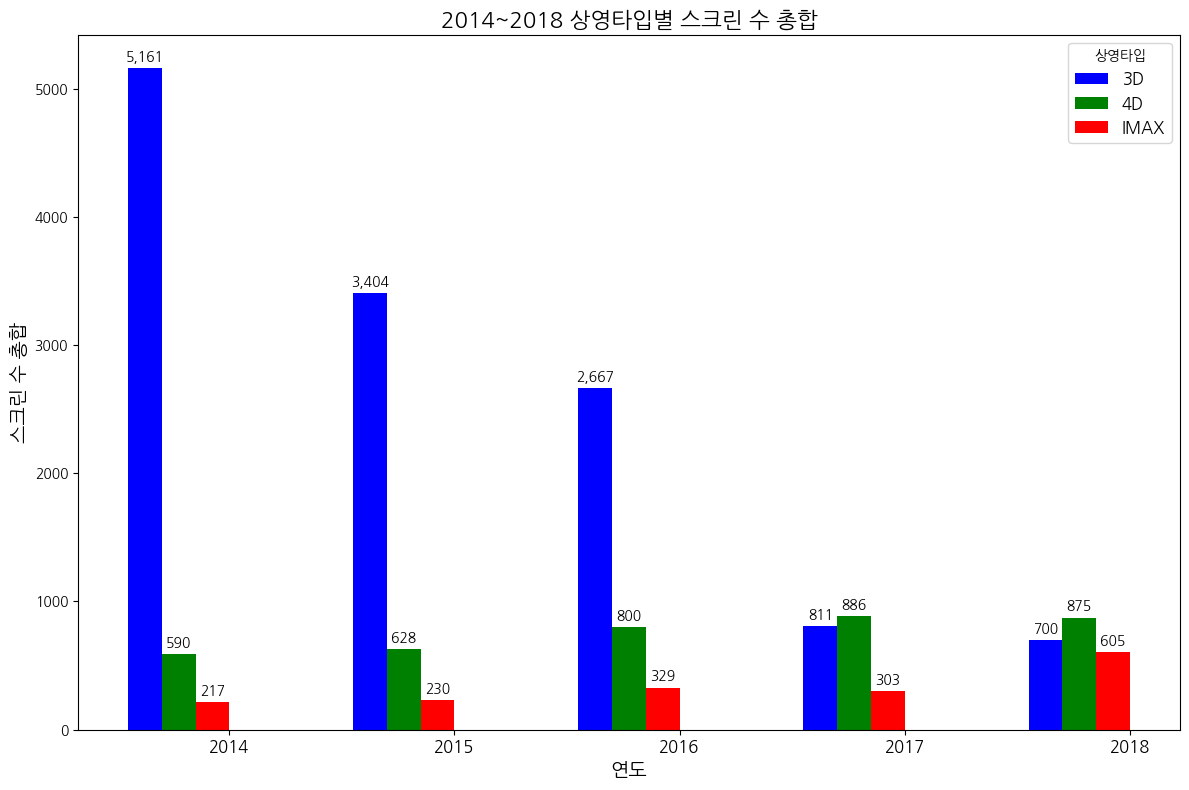

In [70]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import FuncFormatter
import koreanize_matplotlib 

# 한글 사용을 위한 설정
mpl.rc('font', family='NanumGothic')  # 'NanumGothic' 폰트 사용
mpl.rcParams['axes.unicode_minus'] = False  # 마이너스 기호가 깨지지 않도록 설정

# 데이터 정의
years = ['2014', '2015', '2016', '2017', '2018']
screen_data_3d = [5161, 3404, 2667, 811, 700]
screen_data_4d = [590, 628, 800, 886, 875]
screen_data_imax = [217, 230, 329, 303, 605]
# screen_data_2d = [9117.1, 9743.2, 11049.6, 12047.7, 12645.9]

# 그래프 생성
fig, ax = plt.subplots(figsize=(12, 8))

# 막대 그래프 그리기
bar_width = 0.15
index = range(len(years))

bar1 = ax.bar([i - 2.5 * bar_width for i in index], screen_data_3d, bar_width, label='3D', color='blue')
bar2 = ax.bar([i - 1.5 * bar_width for i in index], screen_data_4d, bar_width, label='4D', color='green')
bar3 = ax.bar([i - 0.5 * bar_width for i in index], screen_data_imax, bar_width, label='IMAX', color='red')
# bar4 = ax.bar([i + 0.5 * bar_width for i in index], screen_data_2d, bar_width, label='2D', color='purple')


# 그래프에 라벨 추가
ax.set_xlabel('연도', fontsize=14)
ax.set_ylabel('스크린 수 총합', fontsize=14)
ax.set_title('2014~2018 상영타입별 스크린 수 총합', fontsize=16)
ax.set_xticks(index)
ax.set_xticklabels(years, fontsize=12)
ax.legend(title='상영타입', fontsize=12)

# 숫자 레이블 추가 (각 막대 위에 숫자 표시)
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:,}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # y축 값 위로 약간 이동
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)

add_labels(bar1)
add_labels(bar2)
add_labels(bar3)
# add_labels(bar4)

# 그래프 표시
plt.tight_layout()
plt.show()


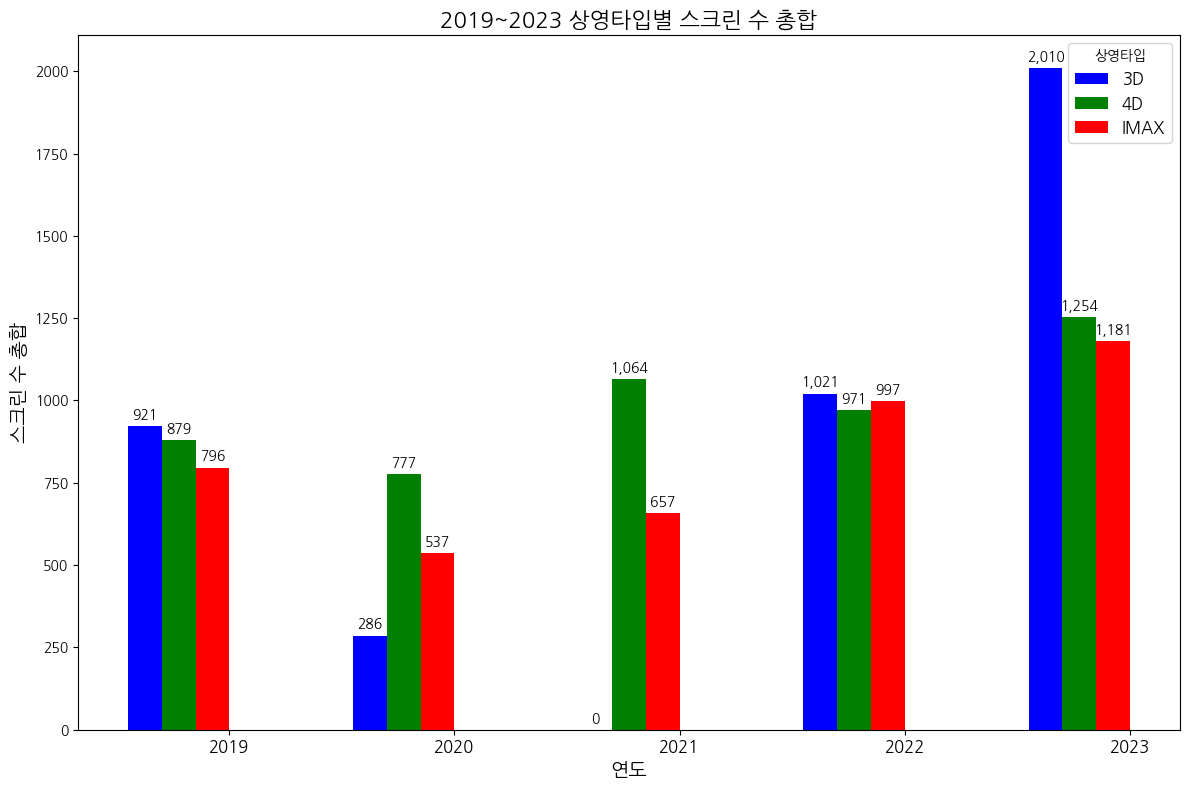

In [69]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import FuncFormatter
import koreanize_matplotlib 

# 한글 사용을 위한 설정
mpl.rc('font', family='NanumGothic')  # 'NanumGothic' 폰트 사용
mpl.rcParams['axes.unicode_minus'] = False  # 마이너스 기호가 깨지지 않도록 설정

# 데이터 정의
years = ['2019', '2020', '2021', '2022', '2023']
screen_data_3d = [921, 286, 0, 1021, 2010]
screen_data_4d = [879, 777, 1064, 971, 1254]
screen_data_imax = [796, 537, 657, 997, 1181]
# screen_data_2d = [14204.4, 12931.8, 13256.0, 13722.4, 14505.5]


# 그래프 생성
fig, ax = plt.subplots(figsize=(12, 8))

# 막대 그래프 그리기
bar_width = 0.15
index = range(len(years))

bar1 = ax.bar([i - 2.5 * bar_width for i in index], screen_data_3d, bar_width, label='3D', color='blue')
bar2 = ax.bar([i - 1.5 * bar_width for i in index], screen_data_4d, bar_width, label='4D', color='green')
bar3 = ax.bar([i - 0.5 * bar_width for i in index], screen_data_imax, bar_width, label='IMAX', color='red')
# bar4 = ax.bar([i + 0.5 * bar_width for i in index], screen_data_2d, bar_width, label='2D', color='purple')


# 그래프에 라벨 추가
ax.set_xlabel('연도', fontsize=14)
ax.set_ylabel('스크린 수 총합', fontsize=14)
ax.set_title('2019~2023 상영타입별 스크린 수 총합', fontsize=16)
ax.set_xticks(index)
ax.set_xticklabels(years, fontsize=12)
ax.legend(title='상영타입', fontsize=12)

# 숫자 레이블 추가 (각 막대 위에 숫자 표시)
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:,}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # y축 값 위로 약간 이동
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)

add_labels(bar1)
add_labels(bar2)
add_labels(bar3)
# add_labels(bar4)


# 그래프 표시
plt.tight_layout()
plt.show()
